In [1]:
from random import randint
import time

import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from tqdm import tqdm

import functions

In [52]:
n_arr = np.array([n for n in range(1, 2001)])

In [37]:
def average_time(func, n, is_matrix: bool = False):
    rand_arr = functions.matrix_gen(n) if is_matrix else [randint(1, 2001) for _ in range(n)] 
    times = []
    for i in range(10):
        start = time.time()
        func(rand_arr)
        end = time.time()
        times.append(end - start)
    return sum(times) / len(times)

In [53]:
def build_const_plot(approx_func, title):
    approx_res = []
    for n in tqdm(n_arr):
        approx_res.append(average_time(approx_func, n))
    theory_res = [0 for i in range(len(n_arr))]
    plt.plot(n_arr, approx_res, label = title + " approx")
    plt.plot(n_arr, theory_res, label = title + " theory")
    plt.xlabel("Number of array elements") 
    plt.ylabel("Execution time in nanoseconds") 
    plt.legend()
    plt.show()

In [39]:
def build_func_plot(approx_func, theory_func, start_values, title, is_matrix: bool = False):
    approx_res = []
    for n in tqdm(n_arr):
        approx_res.append(average_time(approx_func, n, is_matrix))
    popt, pcov = curve_fit(theory_func, n_arr, approx_res, p0=start_values)
    plt.plot(n_arr, approx_res, label = title + " approx")
    plt.plot(n_arr, theory_func(n_arr, *popt), label = title + " theory")
    plt.xlabel("Number of array elements") 
    plt.ylabel("Execution time in nanoseconds") 
    plt.legend()
    plt.show()

100%|██████████| 2000/2000 [00:02<00:00, 970.40it/s] 


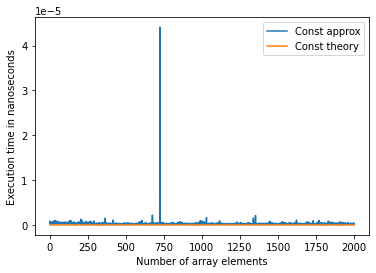

In [278]:
build_const_plot(functions.const_func, "Const")

100%|██████████| 2000/2000 [00:02<00:00, 853.72it/s] 


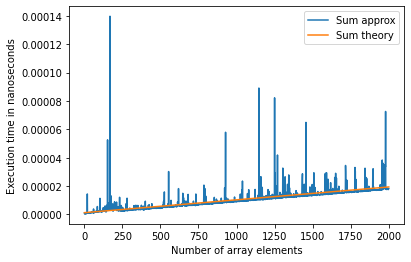

In [282]:
build_func_plot(functions.sum_func, lambda x, a0, a1: a0 + a1 * x, (0, 0), "Sum")

100%|██████████| 2000/2000 [00:11<00:00, 177.92it/s]


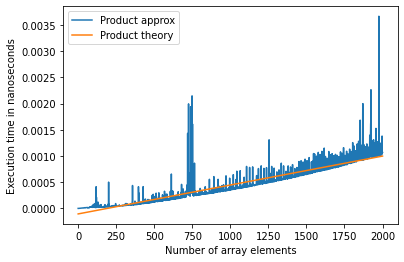

In [283]:
build_func_plot(functions.product_func, lambda x, a0, a1: a1 * x + a0, (0, 0), "Product")

100%|██████████| 1500/1500 [00:03<00:00, 400.52it/s]


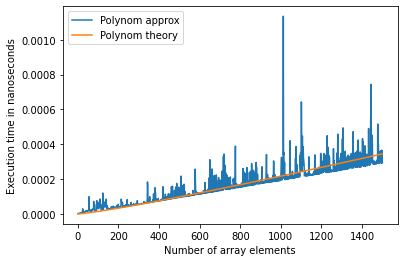

In [58]:
build_func_plot(functions.polynom_func, lambda x, a: x * np.log(x) * a, (0), "Polynom")

100%|██████████| 2000/2000 [00:04<00:00, 401.65it/s]


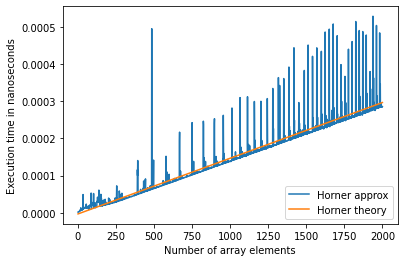

In [50]:
build_func_plot(functions.horner_polynom_func, lambda x, a0, a1: a1 * x + a0, (0, 0), "Horner")

100%|██████████| 2000/2000 [21:58<00:00,  1.52it/s]


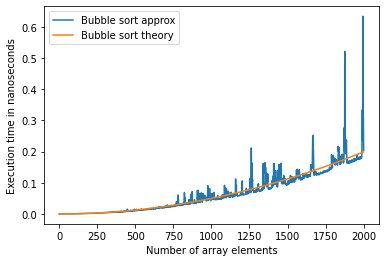

In [286]:
build_func_plot(functions.bubble_sort, lambda x, a: x * x * a, (0), "Bubble sort")

100%|██████████| 2000/2000 [01:03<00:00, 31.53it/s]


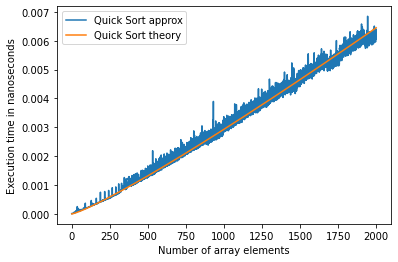

In [287]:
build_func_plot(functions.quick_sort, lambda x, a: x * np.log(x) * a, (0), "Quick Sort")

100%|██████████| 2000/2000 [00:02<00:00, 699.67it/s]


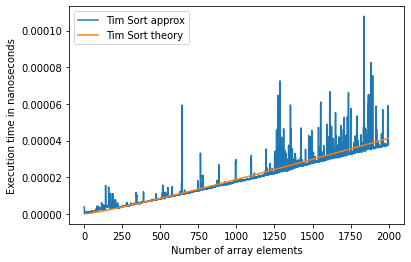

In [288]:
build_func_plot(functions.tim_sort, lambda x, a: x * np.log(x) * a, (0), "Tim Sort")

100%|██████████| 100/100 [00:57<00:00,  1.75it/s]


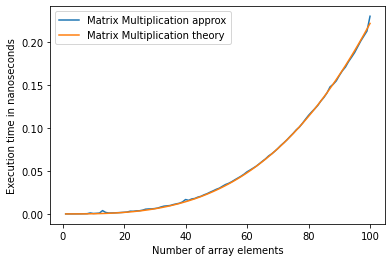

In [5]:
build_func_plot(functions.matrix_multiplication, lambda x, a: x * x * x * a, (0), "Matrix Multiplication", True)